# Decision Tree parameters and classification metrics.

The main objective is to understand the parameters of the Decision Tree model and how to evaluate the model based on the different metrics.


# Instructions

1- Using nested loops and with a split ratio of 20 testing:80 training, try to find the best combined parameters that provide the best accuracy for the testing dataset from:
- max_depth values between 3 and 4 with a step of 1, so possible values are [3,4].
- max_leaf_nodes values between 10 and 15 with a step of 5, so possible values are [10,15].
- min_samples_leaf with values between 10 and 20 with a step of 5, so possible values are [10,15,20].

Plot your results for the testing and training accuracies for each step.

Note: you should end up with 12 plots for the above parameter possible valules.

<font color="red"><b>The first task here is to import the dataset and save it to a dataframe using pandas.</font> For this we will be importing the standard packages that will allow us to use <b>pandas</b>, <b>numpy arrays</b>, and <b>plot</b> the graph. 

Now, we are storing the dataset file into a dataframe named adult, which we will be using for future referencing purpose.

To achieve this we are using the <b> pd.read_csv</b> function to capture the csv dataset file and store it in a dataframe.

After importing, we have displayed the dataframe using it's name and based on this we can see that, the dataframe has <b>32561 rows</b> and <b> 15 columns</b>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as nlp
adult=pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<b>To avoid CPU performance issues,</b> we are truncating our dataframe to 1000 rows and having same number of columns. To acheive this we used the <b>dataframe.truncate(before =' ', after =' ')</b> function with before and after values for truncating the dataframe. Here, <b>before</b> specifies the row number which would remove all the other rows before the specified row number and <b>after</b> specifies the row number which would remove all the remaining rows after a specifed row number. 

After performing this operation, we are storing the truncated dataframe using a different name, in this case <b>adult1000</b>, which is the dataframe name.

In [2]:
adult1000=adult.truncate(before = 0, after = 999)
adult1000

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Private,112840,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,1
996,45,Private,89325,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,0
997,48,Federal-gov,33109,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,58,United-States,1
998,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580,0,40,United-States,0


We will be importing <b>Label Encoder </b> package from <b> sklearn </b>. This package contains the <b>LabelEncoder()</b> function, which will allow us to convert non numerical data into numerical data, which is also known as <b>Encoding </b>.

After the encoding process is done, we are storing this under a new dataframe named <b>adult_encode</b>. 

Now, our dataframe consists of encoded values. For original and scaled data purpose we will be storing the original in one dataframe named <b>adult_encode_copy</b> and the scaled in another dataframe named <b> adult_scaled</b>.

In [3]:
adult1000.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary             int64
dtype: object

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
adult_encode = adult1000.apply(le.fit_transform)
adult_encode_copy=adult_encode.copy()
adult_encode_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,22,6,110,9,12,4,1,1,4,1,6,0,31,28,0
1,33,5,125,9,12,2,4,0,4,1,0,0,10,28,0
2,21,3,667,11,8,0,6,1,4,1,0,0,31,28,0
3,36,3,707,1,6,2,6,0,2,1,0,0,31,28,0
4,11,3,898,9,12,2,10,5,2,0,0,0,31,5,0


Now, we will be using <b> Min Max Scaler</b> for scaling our feature data. <b> Min Max Scaler</b> allows us to transform the feature data. This is achieved by using a specific range for the feature columns and then using this to scale each feature data to the specific range provided. For Scaling, the feature range commonly used would be from 0 to 1. <b> Min Max Scaler</b> reduces the min value in the feature and then it divides by the range value.

<b> Min Max Scaler</b> preserves the shape of feature data and therfore not altering the data during the scaling process.

In order to use the <b> Min Max Scaler</b>, we will be importing the <b> Min Max Scaler Package</b> from <b>Sklearn</b> and then we will use the function <b> MinMaxScaler()</b> to perform the scaling for our encoded data.

After performing this task, we are now going to save the scaled data within a new dataframe named <b>adult_scaled</b>.

In [138]:
x = adult_encode.values 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
adult_scaled = pd.DataFrame(x_scaled)
adult_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.338462,1.000000,0.111562,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.171429,0.0,0.563636,1.000000,0.0
1,0.507692,0.833333,0.126775,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.181818,1.000000,0.0
2,0.323077,0.500000,0.676471,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.563636,1.000000,0.0
3,0.553846,0.500000,0.717039,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.563636,1.000000,0.0
4,0.169231,0.500000,0.910751,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.563636,0.178571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.600000,0.500000,0.240365,0.733333,0.533333,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.781818,1.000000,1.0
996,0.430769,0.500000,0.143002,0.800000,0.866667,0.000000,0.714286,0.2,1.0,1.0,0.000000,0.0,0.654545,1.000000,0.0
997,0.476923,0.166667,0.027383,0.600000,0.800000,0.000000,0.285714,0.8,1.0,1.0,0.000000,0.0,0.818182,1.000000,1.0
998,0.353846,0.500000,0.123732,1.000000,0.600000,0.333333,0.500000,0.0,1.0,1.0,0.285714,0.0,0.563636,1.000000,0.0


We will now split our data into <b>Training data </b> and <b>Testing data </b>. 

For this we will be importing the <b> train_test_split</b> package from <b> sklearn</b> for splitting the data. The <b>train_test_split </b> function will allow us to split the data into <b>Training data </b> and <b>Testing data </b>. 

Now, we will be using two dataframe for splitting purposes and for viewing accuracies for a particular dataframe. We are now going to use the <b> Original Dataframe </b> for splitting. 

Using the <b> train_test_split</b> function we are splitting the data into

- <b> X_train</b>
- <b> X_test</b>
- <b> y_train</b>
- <b> y_test</b> 

for the <b>Original Dataframe </b>

and

- <b> X_train_scaled</b>
- <b> X_test_scaled</b>
- <b> y_train_scaled</b>
- <b> y_test_scaled</b> 

for the <b>Scaled Dataframe </b>

Along with this, we are providing the initial training data size of <b> 80% </b> and testing data size of <b> 20% </b> when splitting the data

Here, we are importing the <b>Decision Tree Classifier</b> package from <b>sklearn</b>, where we will be providing <b>max_depth</b>, <b>max_leaf_nodes</b>, and <b>min_samples_leaf</b> values with the function. We are using list to store the accuracy calues within the list for future referencing purpose.

We are using <b>nested loops</b> to find the best accuracy for the testing data,

where

- <b>max_depth</b> values is between <b>3</b> and <b>4</b> with a step of <b>1</b>. Possible values are <b>[3,4]</b>.
- <b>max_leaf_nodes</b> values is between  <b>10</b> and <b>15</b> with a step of <b>5</b>. Possible values are <b>[10,15]</b>.
- <b>min_samples_leaf_nodes</b> values is between <b>10</b> and <b>20</b> with a step of <b>5</b>. Possible values are <b>[10,15,20]</b>.


Using the <b>Decision Trees Classifier</b> we are then fitting the training values and then testing values. Then, we predict the training and testing accuracies for different <b>max_depth</b>, <b>max_leaf_nodes</b>, and <b>min_samples_leaf</b> values. Based on these, the accuraies are calculated. 

Then we are storing the training and testing accuracies for each different combinations under a different name and we are using indexing number for referencing the values and how it is related to other variables.

In [140]:
#original data split
from sklearn.model_selection import train_test_split
X=adult_encode_copy[['education']] #education
y=adult_encode_copy[['salary']] #salary
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20, random_state=19)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

acc_train_decision_list=[]
acc_test_decision_list=[]

for i in range(3,5,1):
    for j in range(10,20,5):
        for k in range(10,25,5):
            clf_dec = DecisionTreeClassifier(random_state=19,max_depth=i,max_leaf_nodes =j,min_samples_leaf=k)
            clf_dec.fit(X_train,y_train)
            acc_train_decision = clf_dec.score(X_train, y_train)
            acc_train_decision_list.append(acc_train_decision)
            acc_test_decision = clf_dec.score(X_test, y_test)
            acc_test_decision_list.append(acc_test_decision)
            print("For max_depth = ",i,", max_leaf_nodes = ",j,", min_samples_leaf",k,", accuracy on the training data is ",acc_train_decision*100)
            print("For max_depth = ",i,", max_leaf_nodes = ",j,", min_samples_leaf",k,", accuracy on the test data is ",acc_test_decision*100,'\n')
            
            
            
train_accuracies_1 = acc_train_decision_list[0]
train_accuracies_2 = acc_train_decision_list[1]
train_accuracies_3 = acc_train_decision_list[2]
train_accuracies_4 = acc_train_decision_list[3]
train_accuracies_5 = acc_train_decision_list[4]
train_accuracies_6 = acc_train_decision_list[5]
train_accuracies_7 = acc_train_decision_list[6]
train_accuracies_8 = acc_train_decision_list[7]
train_accuracies_9 = acc_train_decision_list[8]
train_accuracies_10 = acc_train_decision_list[9]
train_accuracies_11 = acc_train_decision_list[10]
train_accuracies_12 = acc_train_decision_list[11]

test_accuracies_1 = acc_test_decision_list[0]
test_accuracies_2 = acc_test_decision_list[1]
test_accuracies_3 = acc_test_decision_list[2]
test_accuracies_4 = acc_test_decision_list[3]
test_accuracies_5 = acc_test_decision_list[4]
test_accuracies_6 = acc_test_decision_list[5]
test_accuracies_7 = acc_test_decision_list[6]
test_accuracies_8 = acc_test_decision_list[7]
test_accuracies_9 = acc_test_decision_list[8]
test_accuracies_10 = acc_test_decision_list[9]
test_accuracies_11 = acc_test_decision_list[10]
test_accuracies_12 = acc_test_decision_list[11]

For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 10 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 10 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 15 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 15 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 20 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 20 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  15 , min_samples_leaf 10 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  15 , min_samples_leaf 10 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  15 , min_samples_leaf 15 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  15 , min_samples_le

Accuracy on the training data is  77.25
Accuracy on the test data is  75.0


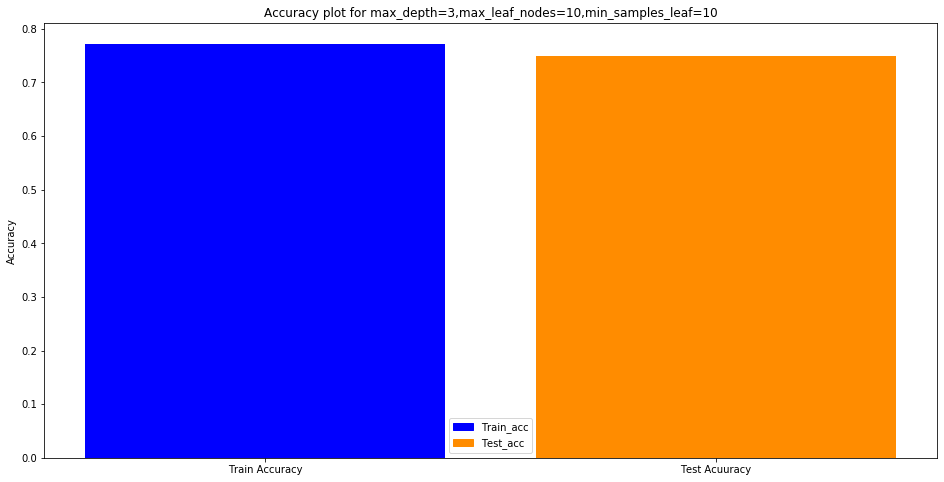

In [141]:
# 1
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_1*100)
print("Accuracy on the test data is ",test_accuracies_1*100)
data1 = [train_accuracies_1,test_accuracies_1]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data1)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=3,max_leaf_nodes=10,min_samples_leaf=10')
plt.bar(range(len(data1)), data1,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.25
Accuracy on the test data is  75.0


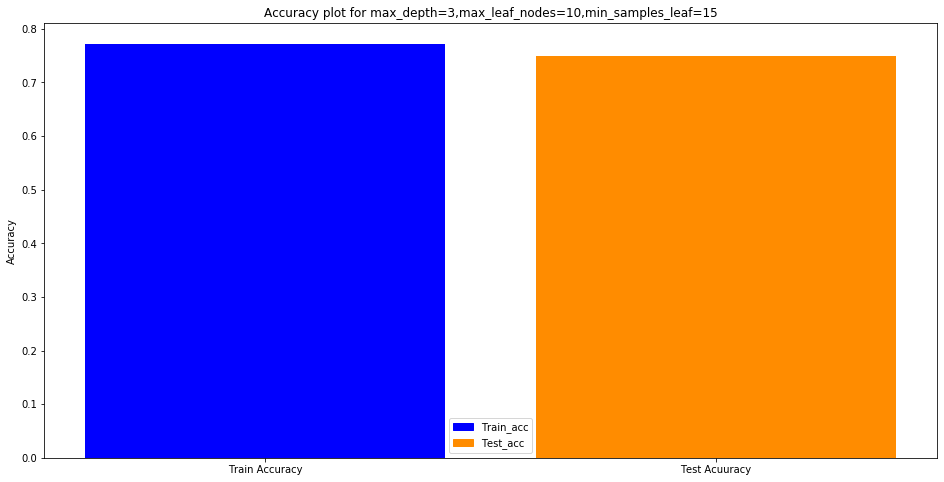

In [142]:
# 2
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_2*100)
print("Accuracy on the test data is ",test_accuracies_2*100)
data2 = [train_accuracies_2,test_accuracies_2]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data2)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=3,max_leaf_nodes=10,min_samples_leaf=15')
plt.bar(range(len(data2)), data2,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.25
Accuracy on the test data is  75.0


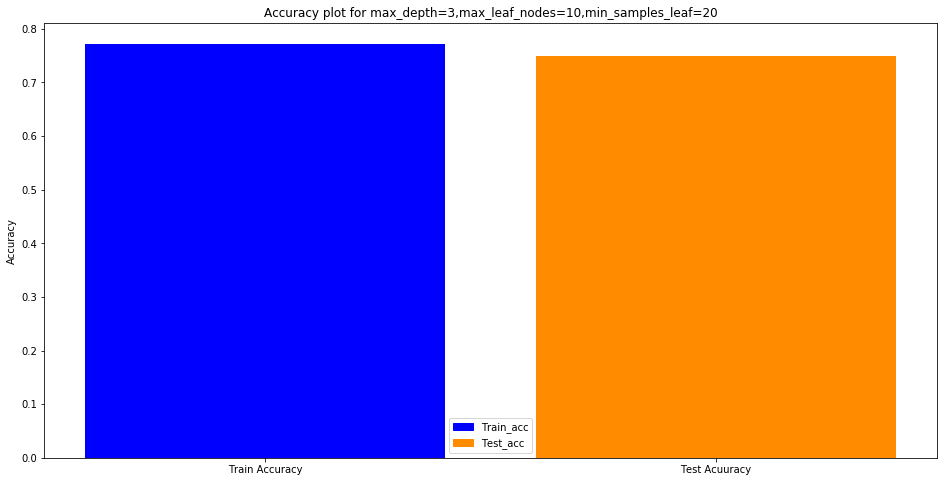

In [143]:
# 3
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_3*100)
print("Accuracy on the test data is ",test_accuracies_3*100)
data3 = [train_accuracies_3,test_accuracies_3]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data3)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=3,max_leaf_nodes=10,min_samples_leaf=20')
plt.bar(range(len(data3)), data3,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.25
Accuracy on the test data is  75.0


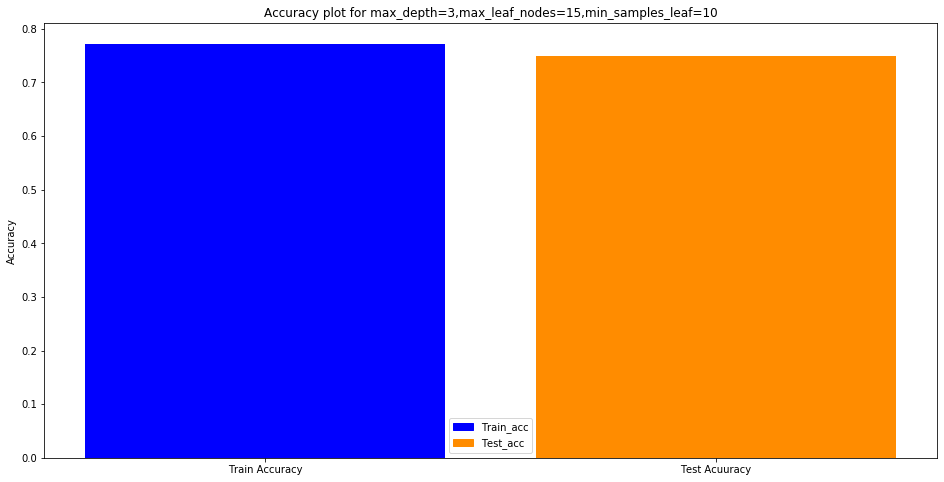

In [144]:
# 4
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_4*100)
print("Accuracy on the test data is ",test_accuracies_4*100)
data4 = [train_accuracies_4,test_accuracies_4]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data4)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=3,max_leaf_nodes=15,min_samples_leaf=10')
plt.bar(range(len(data4)), data4,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.25
Accuracy on the test data is  75.0


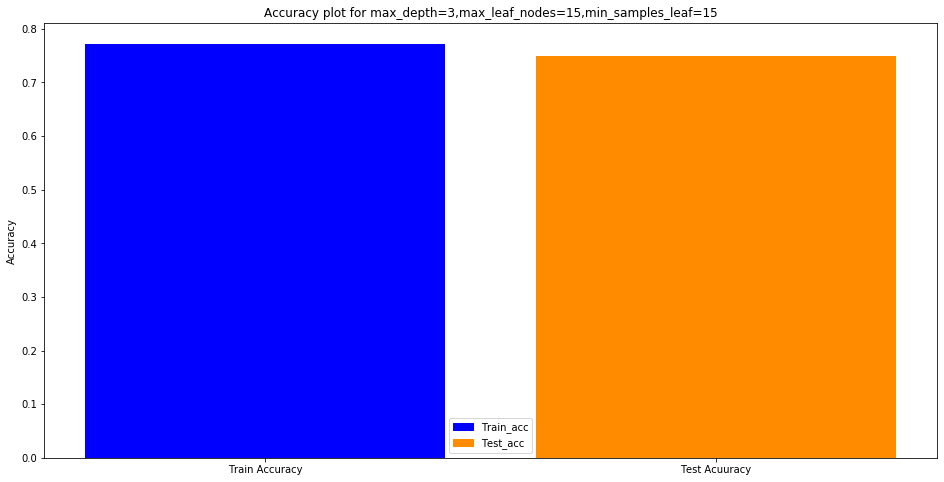

In [145]:
# 5
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_5*100)
print("Accuracy on the test data is ",test_accuracies_5*100)
data5 = [train_accuracies_5,test_accuracies_5]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data5)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=3,max_leaf_nodes=15,min_samples_leaf=15')
plt.bar(range(len(data5)), data5,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.25
Accuracy on the test data is  75.0


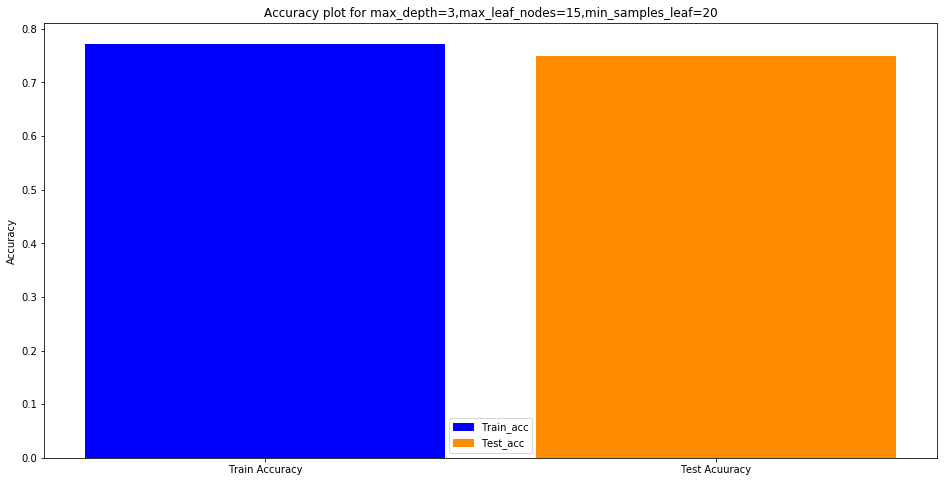

In [146]:
# 6
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_6*100)
print("Accuracy on the test data is ",test_accuracies_6*100)
data6 = [train_accuracies_6,test_accuracies_6]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data6)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=3,max_leaf_nodes=15,min_samples_leaf=20')
plt.bar(range(len(data6)), data6,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  78.5
Accuracy on the test data is  76.0


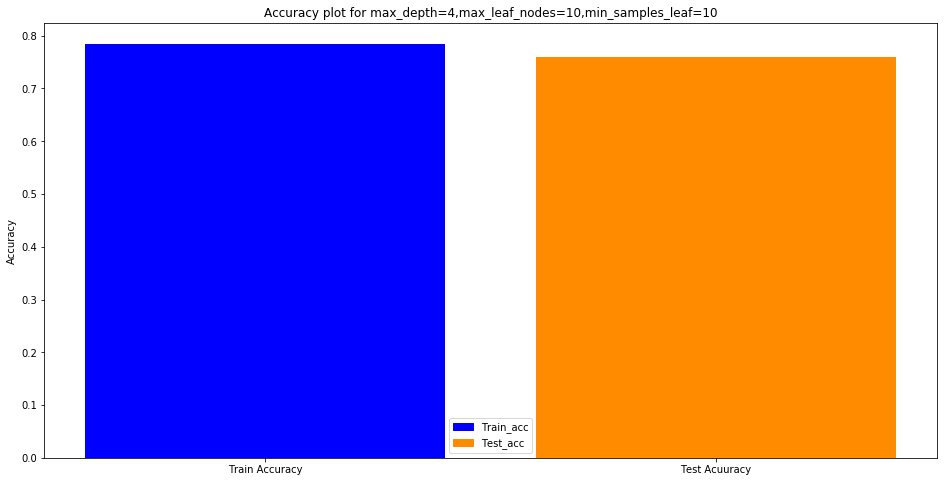

In [147]:
# 7
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_7*100)
print("Accuracy on the test data is ",test_accuracies_7*100)
data7 = [train_accuracies_7,test_accuracies_7]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data7)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=4,max_leaf_nodes=10,min_samples_leaf=10')
plt.bar(range(len(data7)), data7,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.5
Accuracy on the test data is  75.0


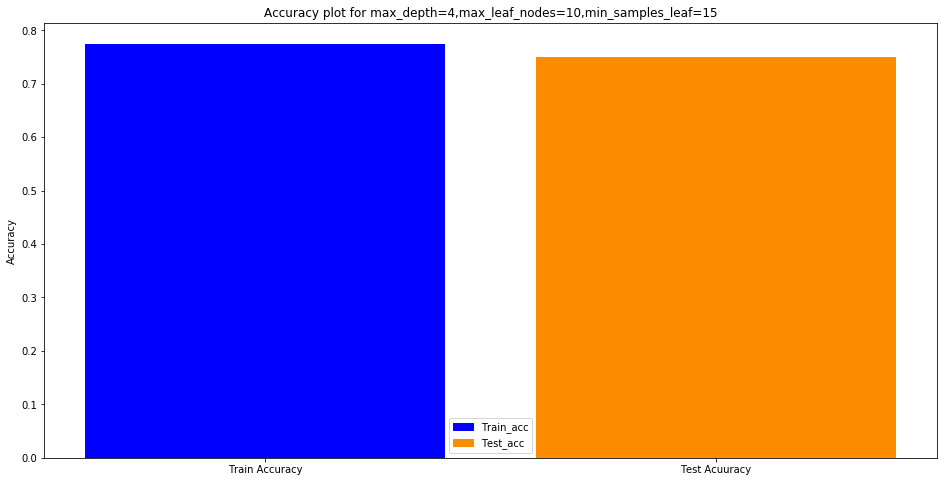

In [148]:
# 8
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_8*100)
print("Accuracy on the test data is ",test_accuracies_8*100)
data8 = [train_accuracies_8,test_accuracies_8]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data8)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=4,max_leaf_nodes=10,min_samples_leaf=15')
plt.bar(range(len(data8)), data8,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.5
Accuracy on the test data is  75.0


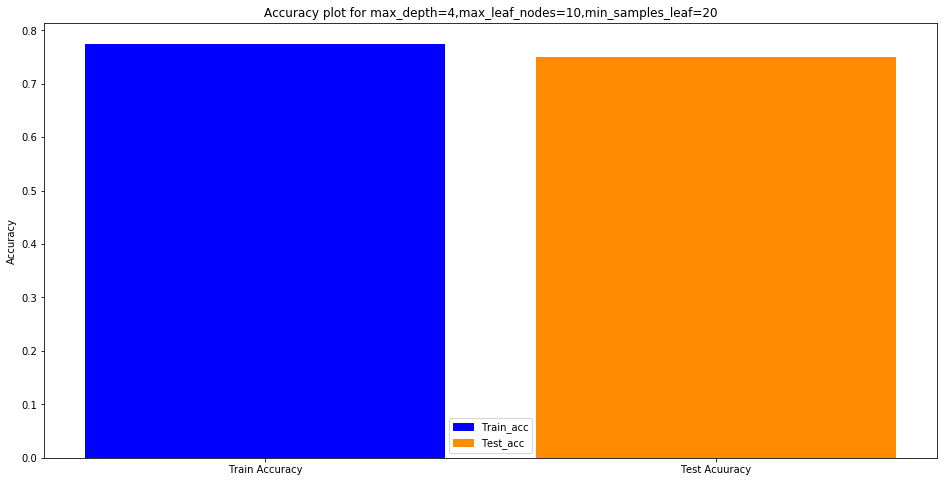

In [149]:
# 9
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_9*100)
print("Accuracy on the test data is ",test_accuracies_9*100)
data9 = [train_accuracies_9,test_accuracies_9]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data9)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=4,max_leaf_nodes=10,min_samples_leaf=20')
plt.bar(range(len(data9)), data9,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  78.5
Accuracy on the test data is  76.0


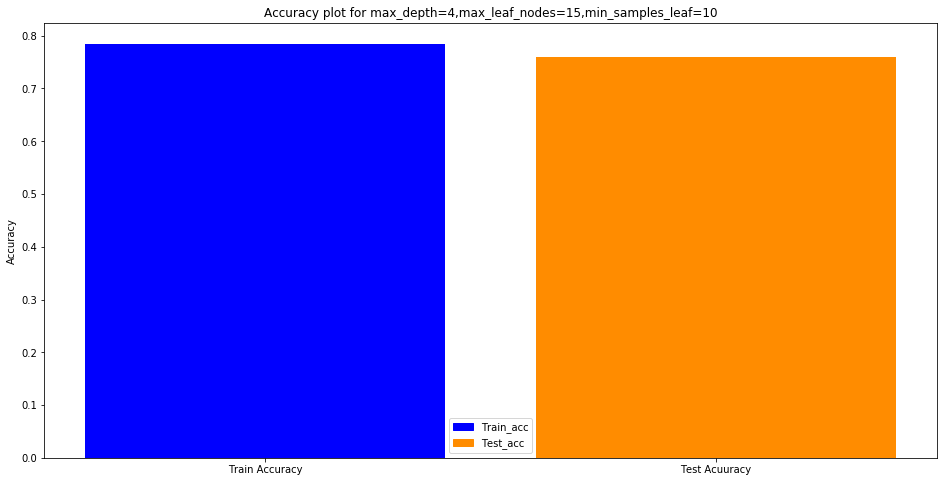

In [150]:
# 10
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_10*100)
print("Accuracy on the test data is ",test_accuracies_10*100)
data10 = [train_accuracies_10,test_accuracies_10]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data10)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=4,max_leaf_nodes=15,min_samples_leaf=10')
plt.bar(range(len(data10)), data10,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.5
Accuracy on the test data is  75.0


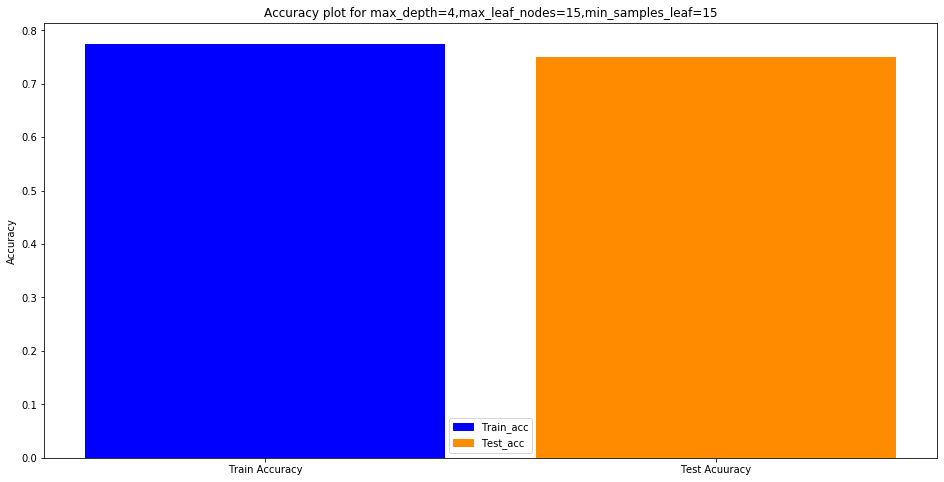

In [151]:
# 11
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_11*100)
print("Accuracy on the test data is ",test_accuracies_11*100)
data11 = [train_accuracies_11,test_accuracies_11]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data11)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=4,max_leaf_nodes=15,min_samples_leaf=15')
plt.bar(range(len(data11)), data11,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

Accuracy on the training data is  77.5
Accuracy on the test data is  75.0


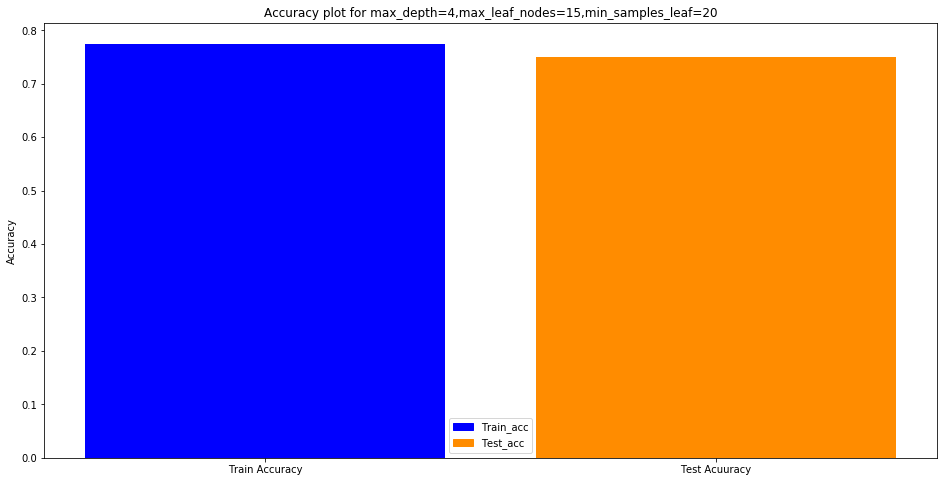

In [152]:
# 12
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
print("Accuracy on the training data is ",train_accuracies_12*100)
print("Accuracy on the test data is ",test_accuracies_12*100)
data12 = [train_accuracies_12,test_accuracies_12]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data12)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=4,max_leaf_nodes=15,min_samples_leaf=20')
plt.bar(range(len(data12)), data12,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

2- Explain your plots and results.

Based on the previous calculated values, now we will be plotting graphs for all the train and test accuracies calculated before. Together, we have now plotted <b>12 graphs</b> for the train vs test accuracy values along with the corresponding <b>max_depth</b>, <b>max_leaf_nodes</b>, and <b>min_samples_leaf</b> values.

Based on the above plots and results, we can see that the highest training and testing accuracy achieved was when 

<b>max_depth =  4</b> , <b>max_leaf_nodes =  10</b> , <b>min_samples_leaf = 10</b> , <b>accuracy on the training data is  78.5</b>
<b>max_depth =  4</b> ,<b> max_leaf_nodes =  10</b> ,<b> min_samples_leaf = 10</b> , <b>accuracy on the test data is  76.0 </b>

<b>max_depth =  4</b> , <b>max_leaf_nodes =  15</b> , <b>min_samples_leaf = 10</b> , <b>accuracy on the training data is  78.5</b>
<b>max_depth =  4</b> , <b>max_leaf_nodes =  15</b> , <b>min_samples_leaf = 10</b> , <b>accuracy on the test data is  76.0</b> 

Other combinations have a similar training and testing accuracy values. Out of the 12, these two combinations had the highest train and test accuracies.

3- Create a for loop that splits the data into testing and training datasets starting from 5:95 ratio until you reach 20:80 ratio with a step of 5, on each step do the following:
- Implement the Decision Trees classifier with the three parameters values found in step 1
- Calculate and display the Confusion Matrix.
- Calculate the AUC and the classification report and display them.
- Plot the ROC curve.

<b>In step 3 </b>for implementing the <b>Decision Trees Classifier</b>, we are taking the best train and test accuracy values achieved with three parameter values from previous results for step 1.

After taking 
<b>max_depth =  4</b> , <b>max_leaf_nodes =  10</b> , <b>min_samples_leaf = 10</b> , <b>accuracy on the training data is  78.5</b>
<b>max_depth =  4</b> ,<b> max_leaf_nodes =  10</b> ,<b> min_samples_leaf = 10</b> , <b>accuracy on the test data is  76.0 </b>

<b>max_depth =  4</b> , <b>max_leaf_nodes =  15</b> , <b>min_samples_leaf = 10</b> , <b>accuracy on the training data is  78.5</b>
<b>max_depth =  4</b> , <b>max_leaf_nodes =  15</b> , <b>min_samples_leaf = 10</b> , <b>accuracy on the test data is  76.0</b> 

we will now be creating a for loop that splits the testing and training data starting from <b>testing of 5%</b> and <b>training of 95%</b> until the values reach <b>testing of 20%</b> and <b>training of 80%</b> with a <b>step of 5</b>. 

The same will be considered for each step with the following criterias specified above.

For different training and testing size, we are using the <b>for loop</b> here and then split the train and test data based on loop. After splitting, we are calculating the train and test accuracies for different train and test size.

Using list, we are storing the train and test accuracy values for the corresponding train and test size in a separate variable.

In [153]:
from sklearn.model_selection import train_test_split
X_loop=adult_encode_copy[['education']] #education
y_loop=adult_encode_copy[['salary']] #salary

acc_train_decision_loop_list=[]
acc_test_decision_loop_list=[]

X_test_loop_list=[]
y_test_loop_list=[]
X_train_loop_list=[]
y_train_loop_list=[]

for i in range(5,25,5):
    X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(X_loop, y_loop,test_size=i/100, random_state=19)
    X_test_loop_list.append(X_test_loop)
    y_test_loop_list.append(y_test_loop)
    X_train_loop_list.append(X_train_loop)
    y_train_loop_list.append(y_train_loop)
    clf_loop = DecisionTreeClassifier(random_state=19,max_depth=4,max_leaf_nodes =10,min_samples_leaf=10)
    clf_loop.fit(X_train_loop,y_train_loop)
    acc_train_decision_loop = clf_loop.score(X_train_loop, y_train_loop)
    acc_train_decision_loop_list.append(acc_train_decision_loop)
    acc_test_decision_loop = clf_loop.score(X_test_loop, y_test_loop)
    acc_test_decision_loop_list.append(acc_test_decision_loop)
    print("For test size = ",i," the accuracy on the training data is ",acc_train_decision_loop*100)
    print("For test size = ",i," the accuracy on the test data is ",acc_test_decision_loop*100,'\n')



For test size =  5  the accuracy on the training data is  78.42105263157895
For test size =  5  the accuracy on the test data is  70.0 

For test size =  10  the accuracy on the training data is  79.0
For test size =  10  the accuracy on the test data is  69.0 

For test size =  15  the accuracy on the training data is  78.3529411764706
For test size =  15  the accuracy on the test data is  76.0 

For test size =  20  the accuracy on the training data is  78.5
For test size =  20  the accuracy on the test data is  76.0 



In [154]:
X_test_loop_1=X_test_loop_list[0]
X_test_loop_2=X_test_loop_list[1]
X_test_loop_3=X_test_loop_list[2]
X_test_loop_4=X_test_loop_list[3]

X_train_loop_1=X_train_loop_list[0]
X_train_loop_2=X_train_loop_list[1]
X_train_loop_3=X_train_loop_list[2]
X_train_loop_4=X_train_loop_list[3]

y_test_loop_1=y_test_loop_list[0]
y_test_loop_2=y_test_loop_list[1]
y_test_loop_3=y_test_loop_list[2]
y_test_loop_4=y_test_loop_list[3]

y_train_loop_1=y_train_loop_list[0]
y_train_loop_2=y_train_loop_list[1]
y_train_loop_3=y_train_loop_list[2]
y_train_loop_4=y_train_loop_list[3]

We will now calculate the <b>Confusion Matrix</b> for each train and test size and print the matrix below.

A <b>Confusion Matrix</b> represents a table, which is used to briefly explain the performance of a model based on the test data. It also summarizes the prediction results for a model.

Based on the values calculated before, we are calculating <b>Confusion Matrix</b> for different train and test size as mentioned before.

In [155]:
#confusionmatrix for test size 5%
X_pred_1=clf_loop.predict(X_test_loop_1)
#This is the confusion matrix for the decision tree classifier:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_loop_1,X_pred_1))

[[33  2]
 [13  2]]


In [156]:
#confusionmatrix for test size 10%
X_pred_2=clf_loop.predict(X_test_loop_2)
#This is the confusion matrix for the decision tree classifier:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_loop_2,X_pred_2))

[[66  4]
 [27  3]]


In [157]:
#confusionmatrix for test size 15%
X_pred_3=clf_loop.predict(X_test_loop_3)
#This is the confusion matrix for the decision tree classifier:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_loop_3,X_pred_3))

[[108   5]
 [ 31   6]]


In [158]:
#confusionmatrix for test size 20%
X_pred_4=clf_loop.predict(X_test_loop_4)
#This is the confusion matrix for the decision tree classifier:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_loop_4,X_pred_4))

[[144   6]
 [ 42   8]]


Now, we will calculate the <b>AUC</b> for <b>Decision Tree</b> of different train and test sizes.

Here <b>AUC</b> is known as <b> Area Under the Curve</b>. <b>AUC</b> is used to measure the performance. It describes, how well the model has performed and how good it holds as the test size increases.

Based on the below calculations, we can see that as the test size increases, the <b>AUC</b> increases. This shows that our model is improved and good at prediction. <b>AUC</b> is most commonly used for diagnostic purposes. It tells us how well the model is at classifying.

The highest accuracy achieved is for test size 20% with an AUC of <b>69%</b>.

In [159]:
#Calculation the Area Under the Curve for the decision tree for test size 5%
from sklearn.metrics import roc_auc_score
dt_auc_1= roc_auc_score(y_test_loop_1,clf_loop.predict_proba(X_test_loop_1)[:,1])
print("Decision tree Area Under the Curve = "+str(dt_auc_1))

Decision tree Area Under the Curve = 0.5961904761904762


In [160]:
#Calculation the Area Under the Curve for the decision tree for test size 10%
from sklearn.metrics import roc_auc_score
dt_auc_2= roc_auc_score(y_test_loop_2,clf_loop.predict_proba(X_test_loop_2)[:,1])
print("Decision tree Area Under the Curve = "+str(dt_auc_2))

Decision tree Area Under the Curve = 0.6261904761904762


In [161]:
#Calculation the Area Under the Curve for the decision tree for test size 15%
from sklearn.metrics import roc_auc_score
dt_auc_3= roc_auc_score(y_test_loop_3,clf_loop.predict_proba(X_test_loop_3)[:,1])
print("Decision tree Area Under the Curve = "+str(dt_auc_3))

Decision tree Area Under the Curve = 0.6553456110978235


In [162]:
#Calculation the Area Under the Curve for the decision tree for test size 20%
from sklearn.metrics import roc_auc_score
dt_auc_4= roc_auc_score(y_test_loop_4,clf_loop.predict_proba(X_test_loop_4)[:,1])
print("Decision tree Area Under the Curve = "+str(dt_auc_4))

Decision tree Area Under the Curve = 0.6923999999999999


<b>Classification Report</b> specifies the metrics used for classifying the model. It measures the prediction quality based on the model. 
Below, we have calculated the <b>Classification Report</b> for each test size from <b>5%</b> to <b>10%</b>.

It is mainly used for representation of <b> Classification Metrics</b> and measure the <b>Performance</b> of the model.

In [163]:
from sklearn.metrics import classification_report 
#The classification report for test size 5%:
print(classification_report(y_test_loop_1,X_pred_1))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.50      0.13      0.21        15

    accuracy                           0.70        50
   macro avg       0.61      0.54      0.51        50
weighted avg       0.65      0.70      0.63        50



In [164]:
from sklearn.metrics import classification_report 
#The classification report for test size 10%:
print(classification_report(y_test_loop_2,X_pred_2))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        70
           1       0.43      0.10      0.16        30

    accuracy                           0.69       100
   macro avg       0.57      0.52      0.49       100
weighted avg       0.63      0.69      0.62       100



In [165]:
from sklearn.metrics import classification_report 
#The classification report for test size 15%:
print(classification_report(y_test_loop_3,X_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       113
           1       0.55      0.16      0.25        37

    accuracy                           0.76       150
   macro avg       0.66      0.56      0.55       150
weighted avg       0.72      0.76      0.71       150



In [166]:
from sklearn.metrics import classification_report 
#The classification report for test size 20%:
print(classification_report(y_test_loop_4,X_pred_4))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       150
           1       0.57      0.16      0.25        50

    accuracy                           0.76       200
   macro avg       0.67      0.56      0.55       200
weighted avg       0.72      0.76      0.71       200



Now, we will plot the <b>ROC Curve</b> for the <b>Decision Tree</b> for different test size. Based on the curve we can see the <b>true</b> and <b>false</b> positive rates.

<b>ROC</b> is known as <b>Receiver Operating Characteristic Curve</b> 

For this we will be importing the <b>roc_curve</b> package from <b>sklearn</b> and using the <b>roc_curve()</b> function, the curve can be plotted.

The graph here shows us the performance of our classification model at different levels of test size.

As the curve becomes closer and it follows the top border of the space, we can say that the test is more accurate. It describes is how good our model is capable of classifying. The higher the curve, the better our model is good at prediction.

<b>ROC Curve</b> measures the performance of our model based on true and false positives.

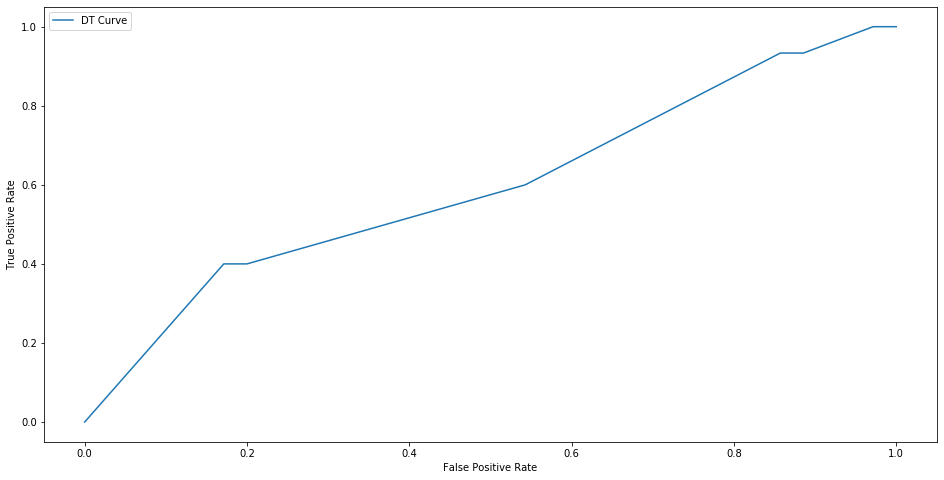

In [172]:
#Drawing the ROC curve for both the decision tree for test size 5%
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test_loop_1,clf_loop.predict_proba(X_test_loop_1)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="DT Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(16, 8)
plt.show()

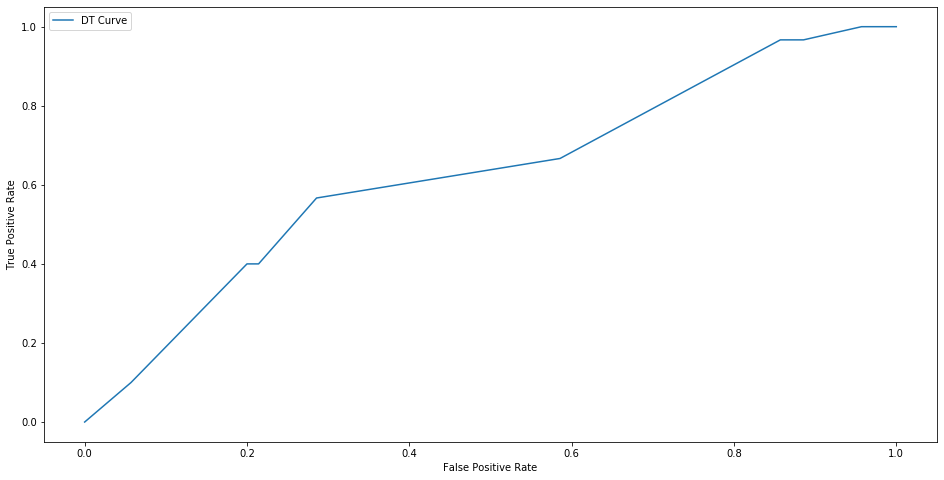

In [173]:
#Drawing the ROC curve for both the decision tree for test size 10%
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_2, tpr_dt_2,_=roc_curve(y_test_loop_2,clf_loop.predict_proba(X_test_loop_2)[:,1])
plt.plot(fpr_dt_2,tpr_dt_2,label="DT Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(16, 8)
plt.show()

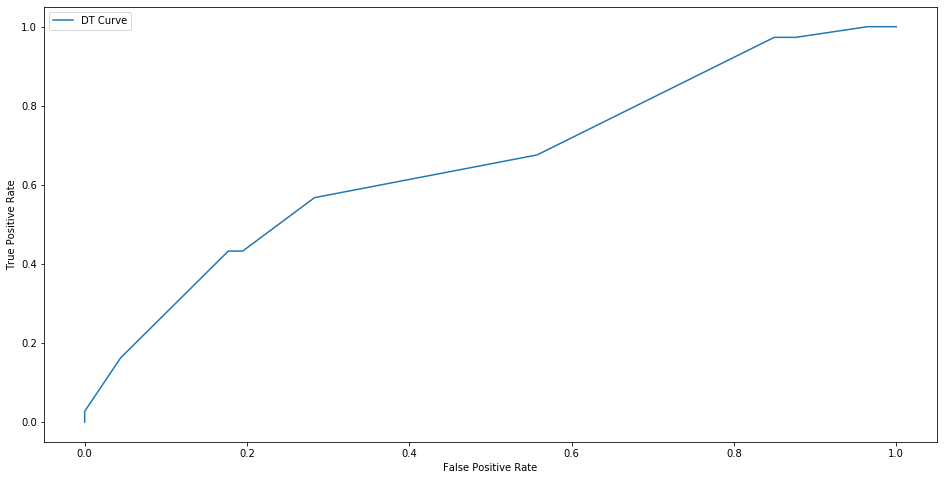

In [174]:
#Drawing the ROC curve for both the decision tree for test size 15%
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_3, tpr_dt_3,_=roc_curve(y_test_loop_3,clf_loop.predict_proba(X_test_loop_3)[:,1])
plt.plot(fpr_dt_3,tpr_dt_3,label="DT Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(16, 8)
plt.show()

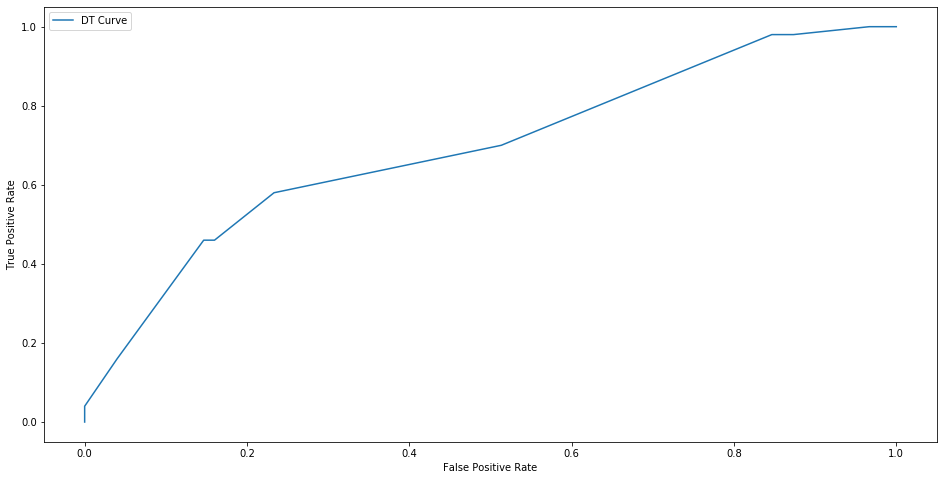

In [175]:
#Drawing the ROC curve for both the decision tree for test size 20%
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_4, tpr_dt_4,_=roc_curve(y_test_loop_4,clf_loop.predict_proba(X_test_loop_4)[:,1])
plt.plot(fpr_dt_4,tpr_dt_4,label="DT Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(16, 8)
plt.show()

4- Explain your results shown in step #3.



<b>Based on the results from step 3,</b> as the test size increases, we see improvements in AUC values and ROC plots. 


Based on the above graphs, we can say that our model is good at classification. It is said that, as the curve increases, the better our model is at prediction.

As for the splitting of train and test data, we took the best parameters and used that to split the data using for loop.

Based on the values calculated, we can see that there is not that much difference in the train and test accuracies, as all different test size has similar train and test accuracies.

Overall, our model is good at classifying based on the results acquired above.

5- Is it required to scale the data for the Decision Trees model, why?



In [171]:
from sklearn.model_selection import train_test_split
X_scaled=adult_scaled[[4]]
y_scaled=adult_scaled[[14]]
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled,train_size=0.80,test_size=0.20, random_state=19)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

for i in range(3,5,1):
    for j in range(10,20,5):
        for k in range(10,25,5):
            clf_dec_scaled = DecisionTreeClassifier(random_state=19,max_depth=i,max_leaf_nodes =j,min_samples_leaf=k)
            clf_dec_scaled.fit(X_train_scaled,y_train_scaled)
            
            clf_dec = DecisionTreeClassifier(random_state=19,max_depth=i,max_leaf_nodes =j,min_samples_leaf=k)
            clf_dec.fit(X_train,y_train)
            acc_train_decision = clf_dec.score(X_train, y_train)
            acc_train_decision_list.append(acc_train_decision)
            acc_test_decision = clf_dec.score(X_test, y_test)
            acc_test_decision_list.append(acc_test_decision)
            print("For max_depth = ",i,", max_leaf_nodes = ",j,", min_samples_leaf",k,", accuracy on the training data is ",acc_train_decision*100)
            print("For max_depth = ",i,", max_leaf_nodes = ",j,", min_samples_leaf",k,", accuracy on the test data is ",acc_test_decision*100,'\n')

acc_train_decision_scaled = clf_dec_scaled.score(X_train_scaled, y_train_scaled) 
acc_test_decision_scaled = clf_dec_scaled.score(X_test_scaled, y_test_scaled)

For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 10 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 10 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 15 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 15 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 20 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  10 , min_samples_leaf 20 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  15 , min_samples_leaf 10 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  15 , min_samples_leaf 10 , accuracy on the test data is  75.0 

For max_depth =  3 , max_leaf_nodes =  15 , min_samples_leaf 15 , accuracy on the training data is  77.25
For max_depth =  3 , max_leaf_nodes =  15 , min_samples_le

<b>A5 :</b> <b>Decision trees in general do not require feature scaling.</b>
- Some models are independent of feature scaling. 
- For example, <b>tree based algorithms such as decision trees</b> are not affected. As we can see from above that, the accuracies of train and test data before and after scaling are same. 
- However it might be useful when comparing performance of different models. Decision trees are not sensitive to the variance in data.
    